### Importing Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Reading the Data

In [2]:
#displaying all the files present in the data directory
print(os.listdir('../input/kdd-cup-1999-data'))

['kddcup.data.gz', 'kddcup.data', 'kddcup.testdata.unlabeled', 'training_attack_types', 'kddcup.data.corrected', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'corrected', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'corrected.gz', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.data_10_percent_corrected', 'typo-correction.txt', 'kddcup.data_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz']


In [3]:
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
df = pd.read_csv(path)
df.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


we need to use the column names from the kddcup.names file, and make a target column using the training_attack_types file

In [4]:
#extracting column headers
with open("../input/kdd-cup-1999-data/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [5]:
columns="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

cols=[]
for c in columns.split(','):
    cols.append(c.strip())
cols.append('target')

print(cols)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [6]:
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=cols)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


lets now add the target column to the dataframe

In [7]:
#extracting Network Attack Types
with open("../input/kdd-cup-1999-data/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [8]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [9]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


## Exploratory Data Analysis

In [10]:
print("The DataFrame has {} rows.".format(df.shape[0]))
print("The DataFrame has {} columns.".format(df.shape[1]))

The DataFrame has 494021 rows.
The DataFrame has 43 columns.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [12]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Clean dataset, no null values present

In [13]:
#number of attacks of each type in the dataframe
df['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

<Axes: xlabel='Attack Type'>

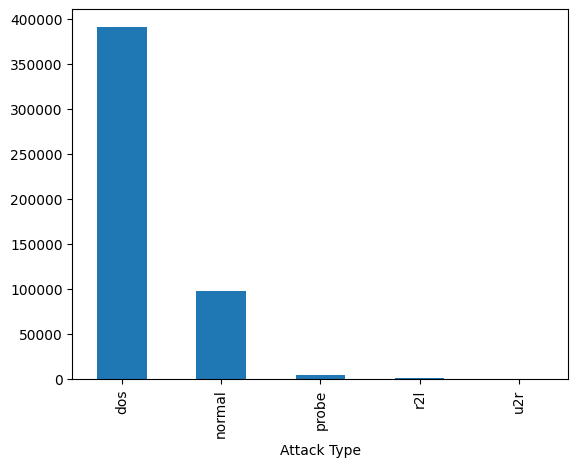

In [14]:
#Visualizing Attack Type categories
df['Attack Type'].value_counts().plot(kind="bar")

<Axes: xlabel='target'>

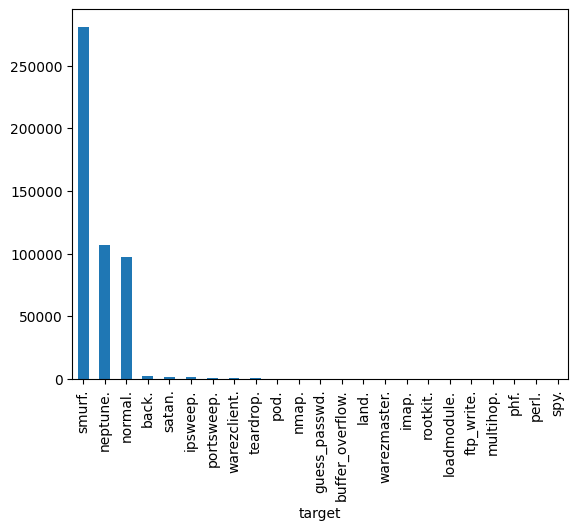

In [15]:
#Visualizing Target categories
df['target'].value_counts().plot(kind="bar")

In [16]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


we need to convert the categorical variables into numeric data

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['protocol_type', 'service', 'flag', 'target', 'Attack Type'], dtype='object')


In [19]:
#infor about the categorical variables
df.describe(include='object')

,protocol_type,service,flag,target,Attack Type
count,494021,494021,494021,494021,494021
unique,3,66,11,23,5
top,icmp,ecr_i,SF,smurf.,dos
freq,283602,281400,378440,280790,391458


In [20]:
#converting categorical data into numeric, and displaying the categorical values and their corresponding numeric labels
from sklearn.preprocessing import LabelEncoder

label_mappings = {} # Dictionary to store mappings for each column

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} -> {encoded}")


Column: protocol_type
  icmp -> 0
  tcp -> 1
  udp -> 2
Column: service
  IRC -> 0
  X11 -> 1
  Z39_50 -> 2
  auth -> 3
  bgp -> 4
  courier -> 5
  csnet_ns -> 6
  ctf -> 7
  daytime -> 8
  discard -> 9
  domain -> 10
  domain_u -> 11
  echo -> 12
  eco_i -> 13
  ecr_i -> 14
  efs -> 15
  exec -> 16
  finger -> 17
  ftp -> 18
  ftp_data -> 19
  gopher -> 20
  hostnames -> 21
  http -> 22
  http_443 -> 23
  imap4 -> 24
  iso_tsap -> 25
  klogin -> 26
  kshell -> 27
  ldap -> 28
  link -> 29
  login -> 30
  mtp -> 31
  name -> 32
  netbios_dgm -> 33
  netbios_ns -> 34
  netbios_ssn -> 35
  netstat -> 36
  nnsp -> 37
  nntp -> 38
  ntp_u -> 39
  other -> 40
  pm_dump -> 41
  pop_2 -> 42
  pop_3 -> 43
  printer -> 44
  private -> 45
  red_i -> 46
  remote_job -> 47
  rje -> 48
  shell -> 49
  smtp -> 50
  sql_net -> 51
  ssh -> 52
  sunrpc -> 53
  supdup -> 54
  systat -> 55
  telnet -> 56
  tftp_u -> 57
  tim_i -> 58
  time -> 59
  urh_i -> 60
  urp_i -> 61
  uucp -> 62
  uucp_path -> 63


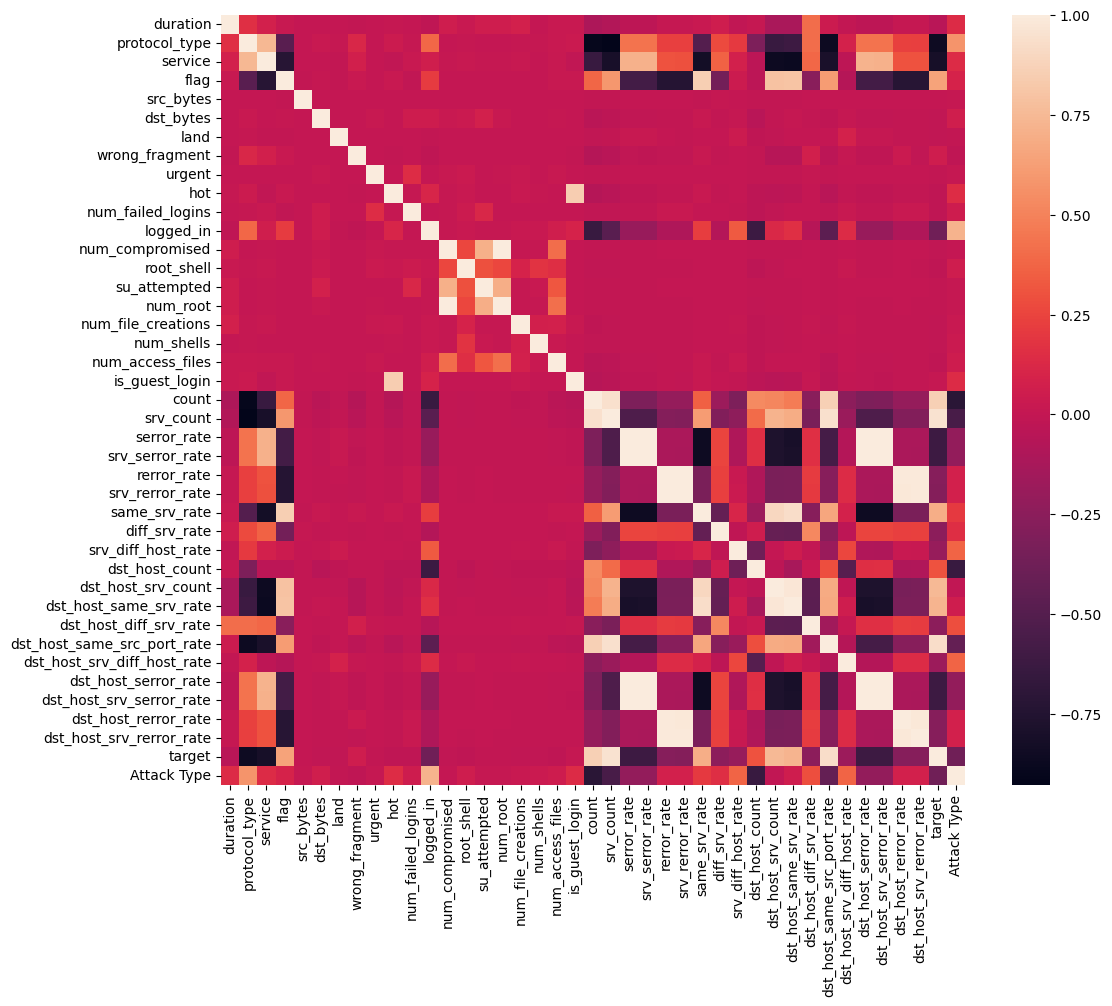

In [21]:
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr)
plt.show()

this matrix displays the correlation between the various attributes of the dataframe

In [22]:
#Dropping the columns which are higly correlated with each other
threshold = 0.95

to_drop = []
for col in corr.columns:
    correlated_cols = corr.index[(corr[col] > threshold) & (corr[col] < 1)].tolist() # columns with correlation above the threshold (excluding correlation with itself)
    to_drop.extend(correlated_cols)

to_drop = list(set(to_drop)) #drop duplicate column names and keep only unique ones

df = df.drop(columns=to_drop)
print(f"Dropped columns: {to_drop}")

df.head()

Dropped columns: ['serror_rate', 'dst_host_serror_rate', 'target', 'srv_rerror_rate', 'srv_serror_rate', 'rerror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'num_compromised', 'dst_host_srv_count', 'srv_count', 'dst_host_srv_rerror_rate', 'num_root']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_guest_login,count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,1,22,9,181,5450,0,0,0,0,...,0,8,1.0,0.0,0.0,9,0.0,0.11,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,0,8,1.0,0.0,0.0,19,0.0,0.05,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,0,8,1.0,0.0,0.0,29,0.0,0.03,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,0,6,1.0,0.0,0.0,39,0.0,0.03,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,0,6,1.0,0.0,0.0,49,0.0,0.02,0.0,1


## Model Creation

### Isolation Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['Attack Type'])  # Features
y = df['Attack Type']  # Target

sc = MinMaxScaler() #without scaling, the performance of the model was very low
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import IsolationForest

# Isolation Forest model
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

IsolationForest(random_state=42)

In [25]:
# Predict anomalies (outliers) in the testing set
y_pred = iso_forest.predict(X_test)

In [26]:
from sklearn.metrics import precision_score, f1_score

#  precision and F1 score using 'macro' average setting
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision (Macro): {precision:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")

Precision (Macro): 0.02
F1 Score (Macro): 0.03


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Autoencoder

In [27]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# input shape
input_shape = X_train.shape[1]

# encoder architecture
encoder_input = Input(shape=(input_shape,))
encoded = Dense(128, activation='relu')(encoder_input)
encoded = Dense(64, activation='relu')(encoded)

# decoder architecture
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# autoencoder model
autoencoder = Model(encoder_input, decoded)


2024-06-04 15:35:07.399562: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 15:35:07.399681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 15:35:07.527665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/5
   93/12351 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1324

I0000 00:00:1717515321.689991      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12351/12351 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0040 - val_loss: 5.6209e-05
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 4.8435e-05 - val_loss: 2.8915e-05
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.9514e-05 - val_loss: 2.3387e-05
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.3525e-05 - val_loss: 1.8387e-05
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.1503e-05 - val_loss: 1.3217e-05


In [29]:
reconstruction_loss = autoencoder.evaluate(X_test, X_test)
print(f"Reconstruction Loss: {reconstruction_loss:.4f}")

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.1740e-05
Reconstruction Loss: 0.0000


Let's make multiple autoencoder models with varying parameters and find out the best ones

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

def create_autoencoder(hidden_units=(64, 32), learning_rate=0.001):
    input_shape = X_train.shape[1]
    autoencoder = Sequential()
    autoencoder.add(Dense(hidden_units[0], activation='relu', input_shape=(input_shape,)))
    autoencoder.add(Dense(hidden_units[1], activation='relu'))
    autoencoder.add(Dense(hidden_units[0], activation='relu'))
    autoencoder.add(Dense(input_shape, activation='sigmoid'))
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return autoencoder

hyperparameters = [
    {'hidden_units': (64, 32), 'learning_rate': 0.001},
    {'hidden_units': (128, 64), 'learning_rate': 0.01},
    {'hidden_units': (256, 128), 'learning_rate': 0.1}
]


trained_autoencoders = []
for params in hyperparameters:
    autoencoder = create_autoencoder(**params)
    history = autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, validation_data=(X_test, X_test))
    trained_autoencoders.append((autoencoder, history))


for idx, (autoencoder, history) in enumerate(trained_autoencoders):
    print(f"Autoencoder {idx+1}: Hidden Units={autoencoder.layers[1].units}, Learning Rate={autoencoder.optimizer.learning_rate.numpy()}")
    reconstruction_loss = autoencoder.evaluate(X_test, X_test)
    print(f"Reconstruction Loss: {reconstruction_loss}")
    print()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0052 - val_loss: 7.4756e-05
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 6.8293e-05 - val_loss: 5.5148e-05
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 4.3787e-05 - val_loss: 4.3221e-05
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 3.6046e-05 - val_loss: 2.6612e-05
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.7080e-05 - val_loss: 5.0669e-05
Epoch 1/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.0018 - val_loss: 2.2806e-04
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.3557e-04 - val_loss: 1.5399e-04
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.1604e-04 - val_loss: 2.4090e-04
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.0939e-04 - val_loss: 1.4140e-04
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1.9581e-04 - val_loss: 3.1196e-04
Epoch 1/5
12351/12351 ━━━━━━